# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [1]:
import os
import glob
import pandas as pd
os.chdir('/Users/khaiyra/Documents/ustacky/Data-Analysis-Project')
#Current working directory that contains your dataset and code file

#### To-Do - Use glob to match the pattern "csv"

In [2]:
extension = 'csv'
#[Write your Code Here]
supermart = glob.glob('/Users/khaiyra/Documents/ustacky/Data-Analysis-Project/*.csv')

In [3]:
# view .csv files in directory
supermart

['/Users/khaiyra/Documents/ustacky/Data-Analysis-Project/Abuja_Branch.csv',
 '/Users/khaiyra/Documents/ustacky/Data-Analysis-Project/Port_Harcourt_Branch.csv',
 '/Users/khaiyra/Documents/ustacky/Data-Analysis-Project/Lagos_Branch.csv']

#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [4]:
supermart = [pd.read_csv(s) for s in supermart]
supermart_df = pd.concat(supermart)
#Export to csv
supermart_df.to_csv('supermarket.csv')

#### To-Do -Read the CSV file using `pd.read_csv` method

In [5]:
# read csv file
df = pd.read_csv('supermarket.csv')

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [7]:
# view first 5 rows of df
df.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [8]:
# drop column unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [10]:
# check number of rows and columns
df.shape

(1000, 17)

There are 1000 rows and 17 columns present in the data.

#### To-Do - Generate the names of the columns using the columns attribute.

In [11]:
# generate columns
print('Names of the columns: ', '\n' , df.columns)

Names of the columns:  
 Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [12]:
# statistical summary
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.220360e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

* The company's data statistical summary follows a particular pattern
* The minimum rating by a customer is seen to be 4 which is not too bad
* There are no outliers

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [13]:
# check sum of missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [14]:
# or alternatively, a function to check for missing values count and percentage missing
def missing(data):
    count_missing = data.isnull().sum()
    count_missing_percentage=round((data.isnull().sum()*100/len(data)))
    missing_column_name=data.columns
    missing_df=pd.DataFrame(zip(count_missing,count_missing_percentage,missing_column_name),
                           columns=['Missing Count', '%Missing', 'ColumnName'])
    missing_df = missing_df.set_index('ColumnName')
    return missing_df

In [15]:
# use fuction on dataframe
missing(df)

,Missing Count,%Missing
ColumnName,,
Invoice ID,0,0.0
Branch,0,0.0
City,0,0.0
Customer type,0,0.0
Gender,0,0.0
Product line,0,0.0
Unit price,0,0.0
Quantity,0,0.0
Tax 5%,0,0.0


The data contains no missing values.

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [16]:
# summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [17]:
# convert Date column
df['Date']= pd.to_datetime(df['Date'])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [18]:
# confirm Date datatype
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

#### To-Do - Repeat the two steps above to the `time` column

In [19]:
# convert Time column datatype
df['Time']= pd.to_datetime(df['Time'])

In [20]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [21]:
# extract Day feature from Date
df['Day'] = df.Date.dt.day
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2021-04-25 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2021-04-25 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2021-04-25 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,2021-04-25 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,2021-04-25 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11


#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [22]:
# extract Month feature from Date
df['Month'] = df.Date.dt.month

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [23]:
# extract Year feature from Date
df['Year'] = df.Date.dt.year

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [24]:
# extract the Hour feature from Time
df['Hour'] = df.Time.dt.hour
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2021-04-25 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2021-04-25 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2021-04-25 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,2021-04-25 16:19:00,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,2021-04-25 15:30:00,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15


In [25]:
# drop column unnamed: 0.1
#df.drop('Unnamed: 0.1', axis=1, inplace=True)

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [26]:
# number of unique hours of sale
df['Hour'].nunique()

11

In [27]:
# array of the unique hours
df['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20])

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [28]:
#Uncomment the code and Run it
categorical_columns = [col for col in df.columns if df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [29]:
#Example - Uncomment the Code and Run it
df['Branch'].unique().tolist()

['B', 'C', 'A']

In [30]:
print("Total Number of unique values in the Branch Column : {}". format(len(df['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [31]:
#[Write Your Code Here]
print("Total Number of unique values in the Invoice ID Column : {}". format(len(df['Invoice ID'].unique().tolist())), '\n',
     "Total Number of unique values in the City Column : {}". format(len(df['City'].unique().tolist())), '\n',
     "Total Number of unique values in the Customer type Column : {}". format(len(df['Customer type'].unique().tolist())), '\n',
     "Total Number of unique values in the Gender Column : {}". format(len(df['Gender'].unique().tolist())), '\n',
     "Total Number of unique values in the Product line Column : {}". format(len(df['Product line'].unique().tolist())),'\n',
     "Total Number of unique values in the Payment Column : {}". format(len(df['Payment'].unique().tolist())))

Total Number of unique values in the Invoice ID Column : 1000 
 Total Number of unique values in the City Column : 3 
 Total Number of unique values in the Customer type Column : 2 
 Total Number of unique values in the Gender Column : 2 
 Total Number of unique values in the Product line Column : 6 
 Total Number of unique values in the Payment Column : 3


#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [32]:
#Example
df['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [33]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

Lagos has the most Branch count.

In [34]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

The most common customers are the Member type - Returning customer with membership card

In [35]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

The Females are seen to be the most patronizing customers by a difference of 2 with respect to the Male gender

In [36]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

Fashion accesories has the highest count in the Product line, followed by Food and beverages while Health and beauty is the least

In [37]:
df['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

By a difference of 1 between Electronic and Cash mode of payment; Epay has the highest count while card payment has the least.

## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [38]:
# groupby object with the City column and aggregation function of sum
df.groupby(by=['City'], as_index=False).sum()

,City,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,Abuja,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,5068,665,670308,5029
1,Lagos,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,5232,688,686460,4987
2,Port Harcourt,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,4956,640,662232,4894


In [39]:
# groupby object with the City column and aggregation function of mean
df.groupby(by=['City'], as_index=False).mean()

,City,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,Abuja,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,15.265060,2.003012,2019.0,15.147590
1,Lagos,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,15.388235,2.023529,2019.0,14.667647
2,Port Harcourt,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,15.109756,1.951220,2019.0,14.920732


#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [40]:
# gross income of each city
gross_income = df.groupby(by=['City'], as_index=False)['gross income'].sum()
gross_income

,City,gross income
0,Abuja,1820531.52
1,Lagos,1820577.78
2,Port Harcourt,1895463.54


In [41]:
# city with the highest total gross income
gross_income.sort_values(by=['gross income'],ascending=False)

,City,gross income
2,Port Harcourt,1895463.54
1,Lagos,1820577.78
0,Abuja,1820531.52


Port Harcourt has the highest total gross income across the cities

In [42]:
#  unit price
df.groupby(by=['City'], as_index=False)['Unit price'].sum().sort_values(by=['Unit price'],ascending=False)

,City,Unit price
1,Lagos,6705176.4
2,Port Harcourt,6684393.6
0,Abuja,6652396.8


In [43]:
# quantity
df.groupby(by=['City'], as_index=False)['Quantity'].sum().sort_values(by=['Quantity'],ascending=False)

,City,Quantity
1,Lagos,1859
2,Port Harcourt,1831
0,Abuja,1820


## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

Text(0.5, 1.0, 'Branch sales record')

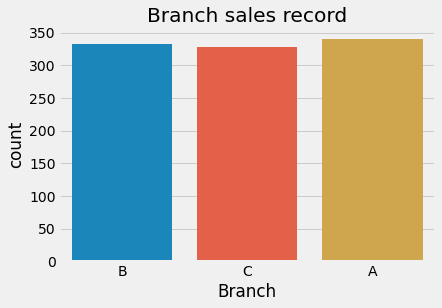

In [44]:
# branch with highest sales record
sns.countplot(x=df['Branch']).set_title('Branch sales record')

Branch A has the highest sales record.

#### Explore a countplot for the `Payment` and `City` Column

Text(0.5, 1.0, 'Payment method')

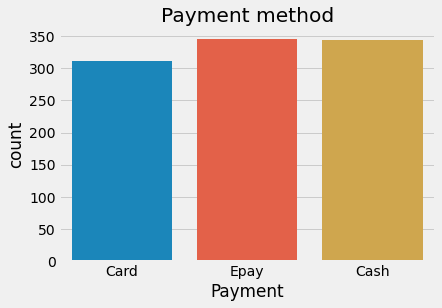

In [45]:
# most used payment method
sns.countplot(x=df['Payment']).set_title('Payment method')

Epay is the most used payment method.

Text(0.5, 1.0, 'City sales')

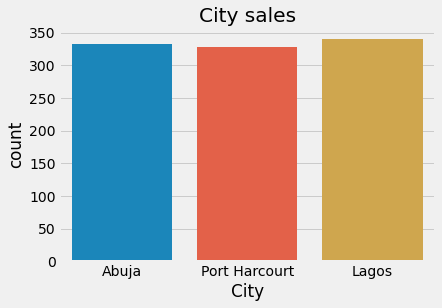

In [46]:
# city with most sales
sns.countplot(x=df['City']).set_title('City sales')

Lagos has the most sales

Text(0.5, 1.0, 'Gender countplot')

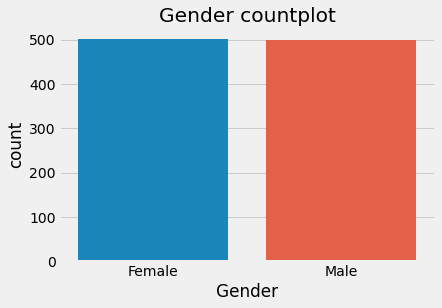

In [47]:
# gender
sns.countplot(x=df['Gender']).set_title('Gender countplot')

Text(0.5, 1.0, 'Count of Customer type')

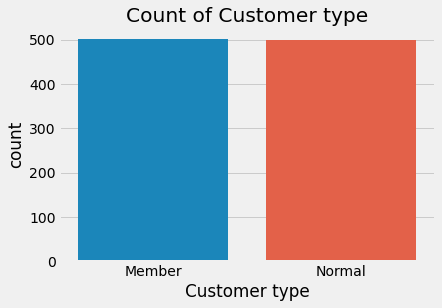

In [48]:
# customer type
sns.countplot(x=df['Customer type']).set_title('Count of Customer type')

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

Text(0.5, 1.0, 'Count of product line')

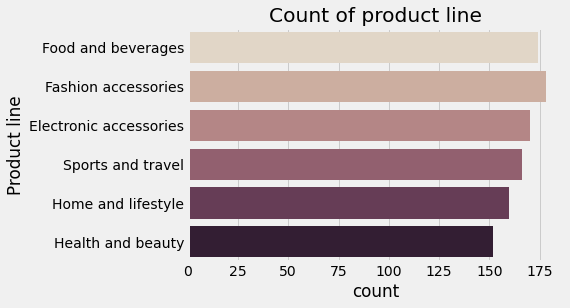

In [49]:
# highest and lowest sold product line
sns.countplot(y=df['Product line'],palette='ch:.25').set_title('Count of product line')

* The highest sold product line is the Fashion accesories while
* Lowest sold product is Health and beauty line 

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

Text(0.5, 1.0, 'Payment channel per product line')

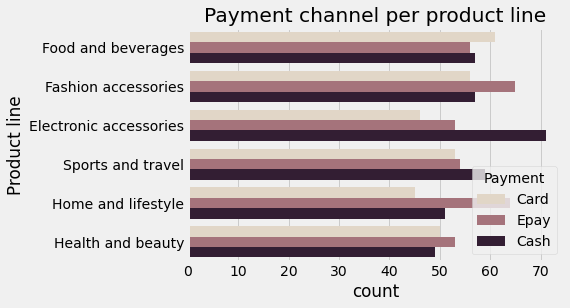

In [50]:
# payment channel by most customer
sns.countplot(y=df['Product line'], hue = df['Payment'], palette='ch:.25').set_title('Payment channel per product line')

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

Text(0.5, 1.0, 'Payment channel by branch')

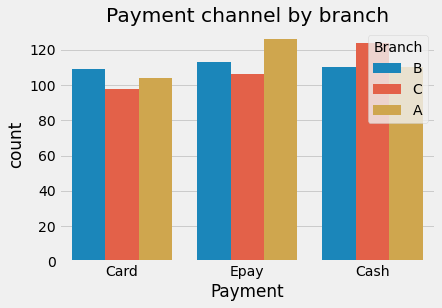

In [51]:
# payment by each branch
sns.countplot(x=df['Payment'], hue = df['Branch']).set_title('Payment channel by branch')

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

Text(0.5, 1.0, 'Ratings by branch')

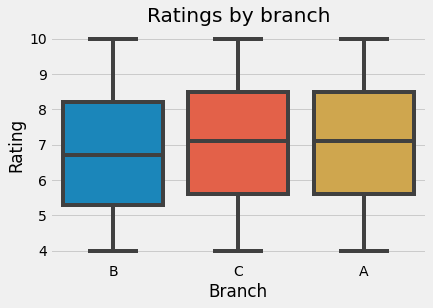

In [52]:
# rating boxplot
sns.boxplot(x= 'Branch', y = 'Rating', data = df).set_title('Ratings by branch')

In [53]:
#[Write your answer here]

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

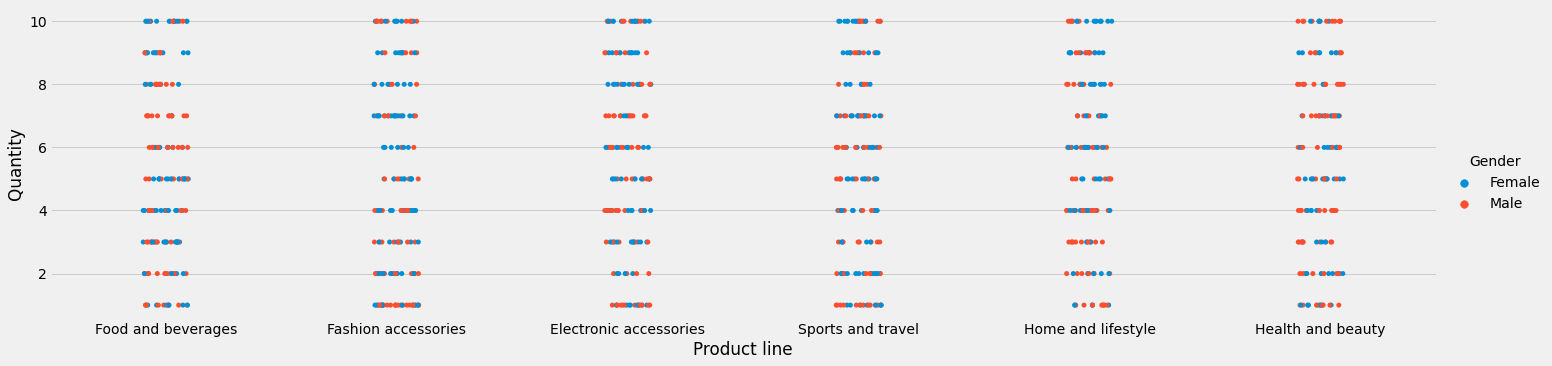

In [54]:
# gender type on products purchased
sns.catplot(x='Product line', y ='Quantity', hue='Gender', data =df, aspect=4)

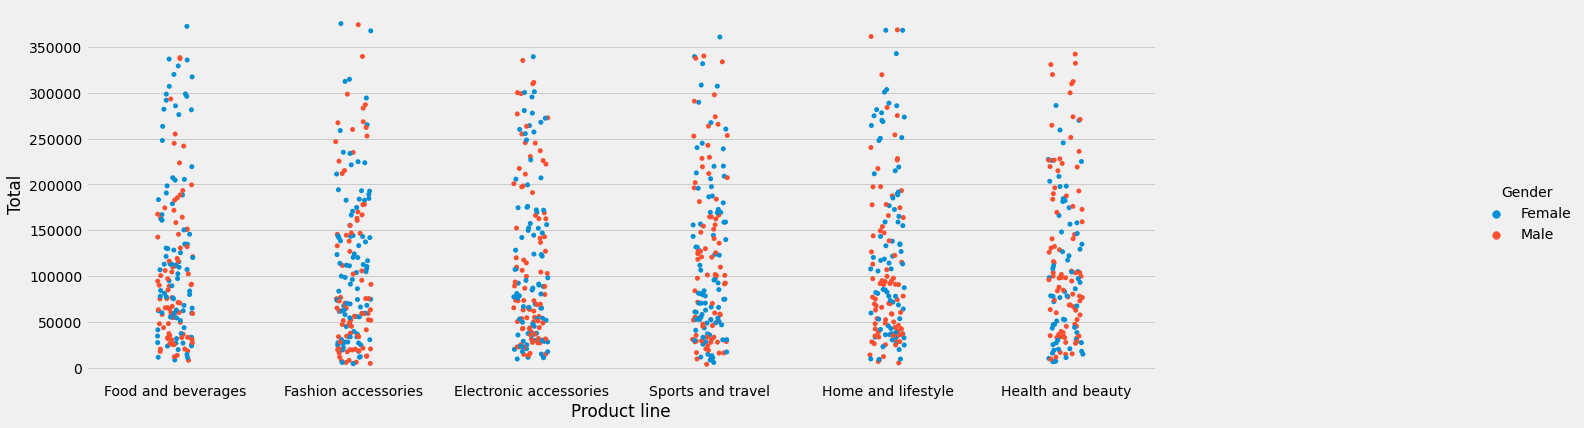

In [55]:
g = sns.catplot(x='Product line', y ='Total', hue='Gender', data =df)
g.fig.set_figwidth(26)
g.fig.set_figheight(6)

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

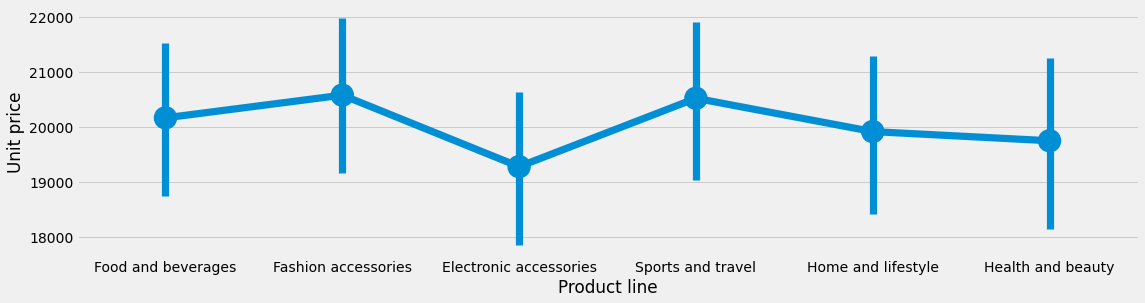

In [56]:
# Product line per unit price
g = sns.catplot(x='Product line', y ='Unit price', kind='point', data =df)
g.fig.set_figwidth(22)
g.fig.set_figheight(4)

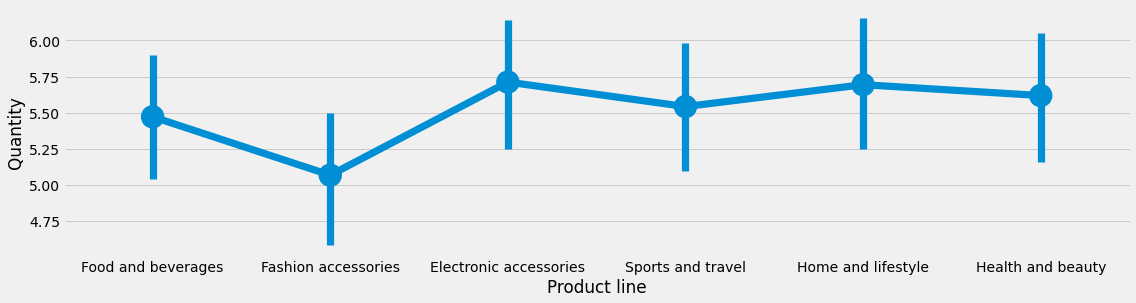

In [57]:
# Product line per Quantity
g = sns.catplot(x='Product line', y ='Quantity', kind='point', data =df)
g.fig.set_figwidth(22)
g.fig.set_figheight(4)

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


* Using a catplot()to generate volin visualization for the "Quantity" on x-axis, 'Day' on the y-axis. 

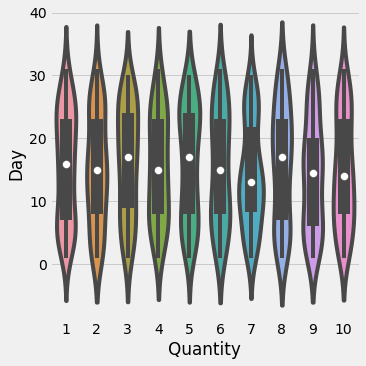

In [58]:
sns.catplot(x='Quantity', y= 'Day', kind='violin', data=df)

* Ploting the number of orders for different branch by creating a groupby using the count of 'Invoice ID'. 

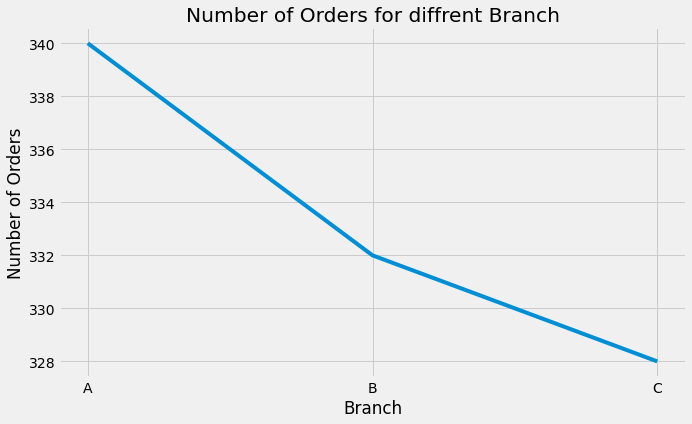

In [59]:
orders = df.groupby(by=['Branch'], as_index=False)['Invoice ID'].count()

plt.subplots(figsize=(10,6))
plt.plot(orders.Branch, orders['Invoice ID'])
plt.xlabel('Branch')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for diffrent Branch')
plt.show()

In [60]:
# number of orders
orders.sort_values(by='Invoice ID', ascending=False).head()

,Branch,Invoice ID
0,A,340
1,B,332
2,C,328


* Using a catplot() generate visualization for the 'Quantity' on x-axis, 'Day' on the y-axis, and hue as 'Gender'. 

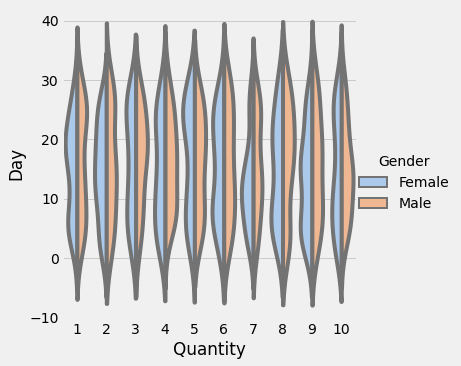

In [61]:
# orders per day
sns.catplot(x='Quantity', y='Day', kind='violin',hue = 'Gender',inner=None, split=True,
            palette='pastel' , data = df)

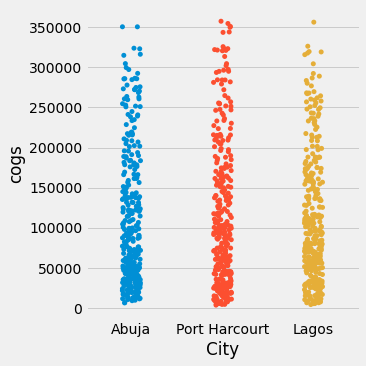

In [62]:
#unit price and product line
sns.catplot(x='City', y='cogs', data=df)

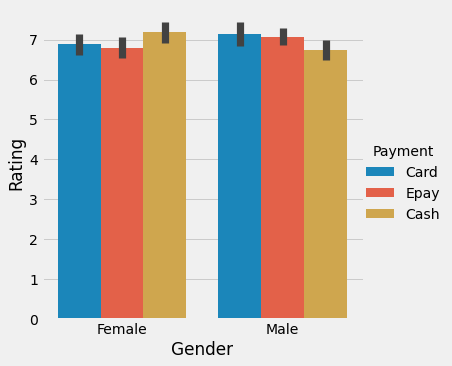

In [63]:
sns.catplot(x='Gender', y='Rating', hue='Payment', kind='bar', data=df)

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 